Now you will choose multiple independent variables (X1, X2, ...) to fit to Pressure, based on the previous lecture by Luca. You can also change whether the variables should be linear or nonlinear.

You can change the graphical plotting parameters using what you learnt earlier, and also using the following link: https://www.statmethods.net/advgraphs/parameters.html

You can also add parameters into your dataset that you might want to subset to better improve the model (V1, V2, ...)

Then fit a statistical model for the data and examine how well the model fits the data, using the R<sup>2</sup> value and the graph with the fitted line.

To export your graphs: Once you have run the code, right click on the graph and choose "Create New View for Output". a new window will appear and you will be able to right click on each graph and choose "Save image as". Once you have saved all graphs you can close the "Output View" window additional window.

QUESTION: HOW TO ACCOUNT FOR THE EFFECT OF TEMPERATURE, DIRECTLY OR INDIRECTLY?

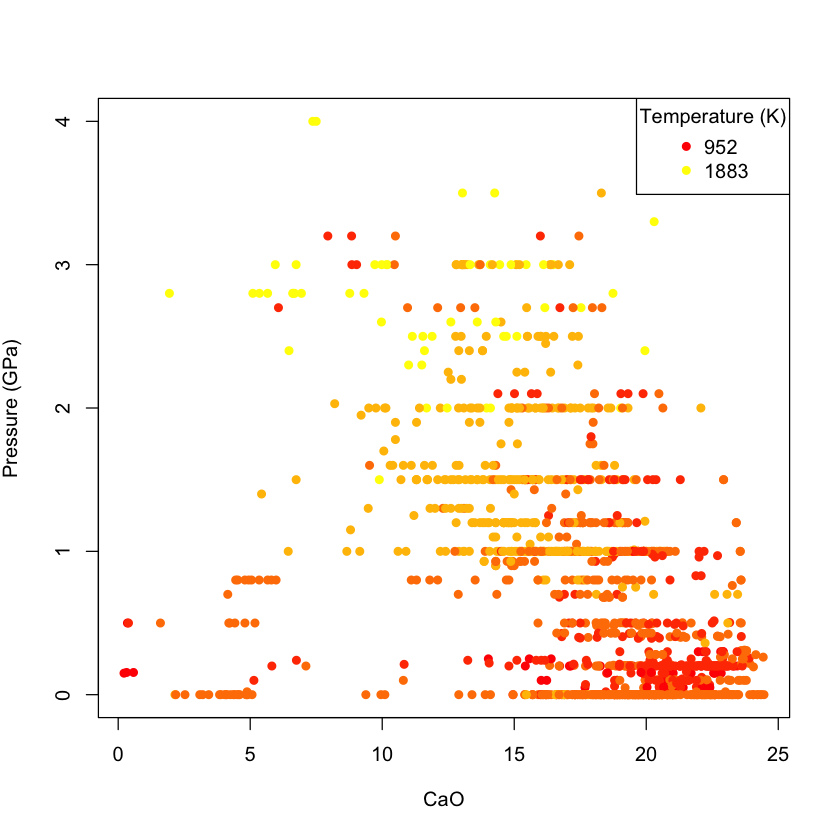

In [81]:
experiments <- read.table("CPX_experiments.txt",sep="\t",header=TRUE)

xvar <- experiments$CaO.cpx
yvar <- experiments$P_GPa
ylab <- expression(paste("Pressure (GPa)"))
xlab <- expression(paste("Ca"[],"O"[]))

colourvar <- experiments$T_K
colourvarname <- "Temperature (K)"
n.colours <- 5
pal <- colorRampPalette(c("red", "yellow"))

col.points <- pal(n.colours)[cut(colourvar,breaks = n.colours)] #do not change

plot(xvar,yvar,col=col.points,pch=16,cex=1,xlab=xlab,ylab=ylab) 
legend("topright",title = colourvarname,legend = round(c(min(experiments$T_K),max(experiments$T_K)),0),col = pal(2), pch = 16) #do not change

Now you should create a dataframe to organise the variables that are important for your model. First list the variables and then build the data frame.

QUESTION: HOW TO USE OUR KNOWLEDGE OF CRYSTALLOGRAPHY TO INFORM OUR DECISION?

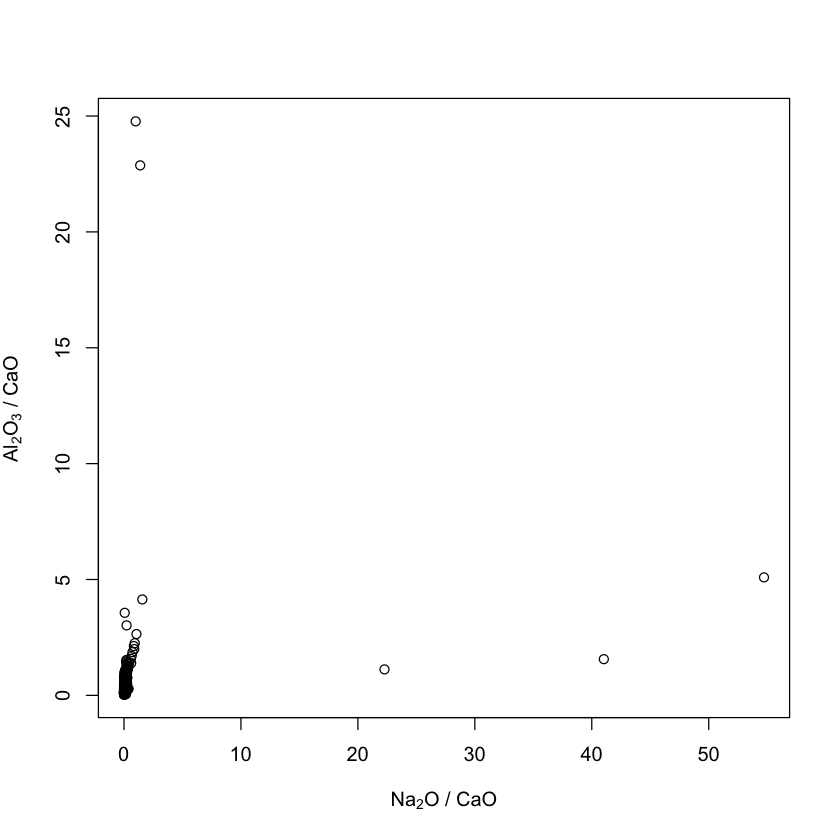

In [73]:
Y <- experiments$P_GPa

X1 <- experiments$Na2O.cpx / experiments$CaO.cpx
X2 <- experiments$Al2O3.cpx / experiments$CaO.cpx
X1lab <- expression(paste("Na"[2],"O"[]," / ","Ca"[],"O"[]))
X2lab <- expression(paste("Al"[2],"O"[3]," / ","Ca"[],"O"[]))


V1 <- experiments$T_K
V2 <- experiments$K2O.liq + experiments$Na2O.liq

data_all <- data.frame(Y,X1,X2,V1,V2)

no.data <- which(is.na(data_all)==TRUE,arr.ind=TRUE)

df <- invisible(if(length(no.data)>0) {data_all[-unique(no.data[,1]),]} else {data_all})

plot(data_all$X1,data_all$X2,xlab=X1lab,ylab=X2lab)

Now choose parameters to subset the data, based on how you defined V1 and V2 above, and what you learnt yesterday.

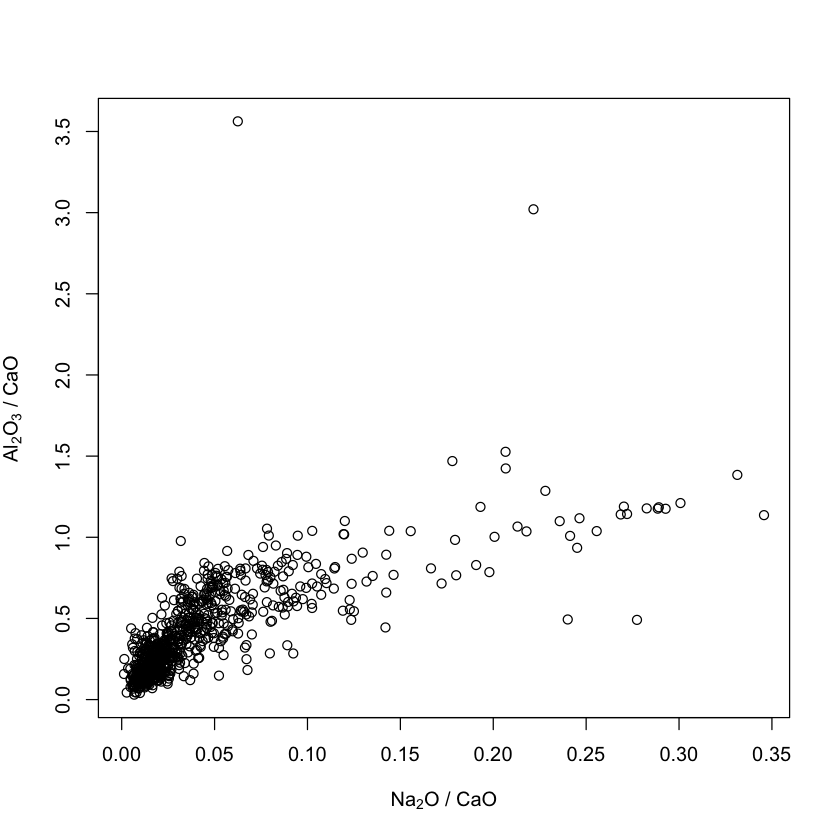

In [82]:
id.subset <- which(data_all$V1 > 900 & data_all$V2 < 6 & data_all$X1 < 10 & data_all$X2 < 5) #print(ID)
#id.subset <- which(data_all$V1 > 900 & data_all$V2 < 20 & data_all$X1 < 100 & data_all$X2 < 50) #print(ID)

df <- data_all[id.subset,]
plot(df$X1,df$X2,xlab=X1lab,ylab=X2lab)

Now fit a model to estimate pressure


Call:
lm(formula = Y ~ (X1 + X2), data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2005 -0.3552 -0.0946  0.2757  2.5375 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.14655    0.02816   5.203 2.43e-07 ***
X1           8.14666    0.53262  15.295  < 2e-16 ***
X2           1.13539    0.08604  13.195  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5124 on 884 degrees of freedom
Multiple R-squared:  0.6365,	Adjusted R-squared:  0.6357 
F-statistic: 774.1 on 2 and 884 DF,  p-value: < 2.2e-16


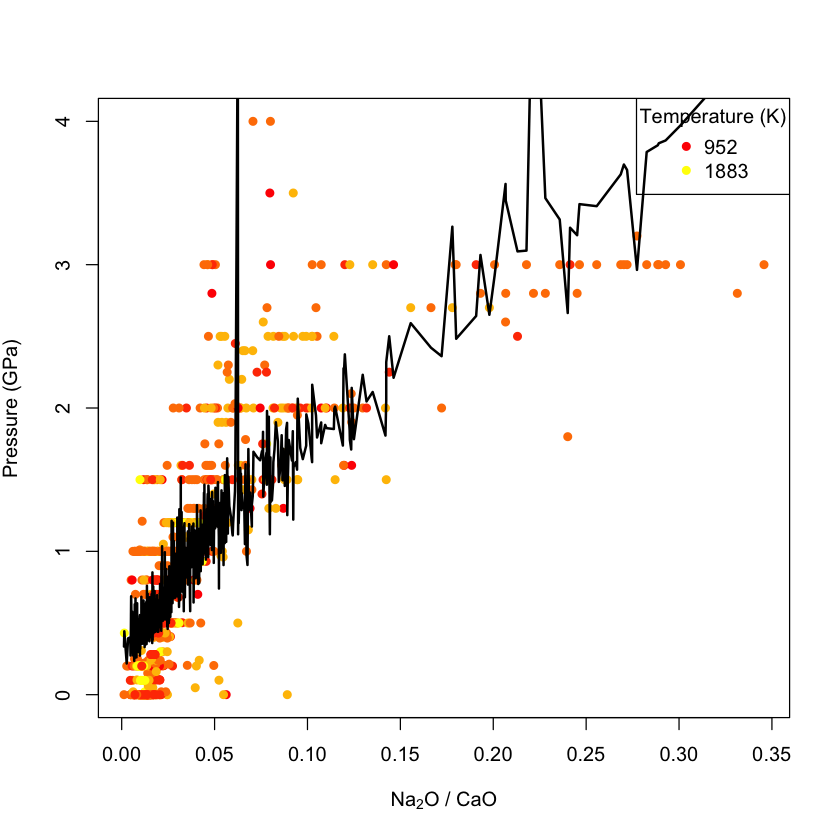

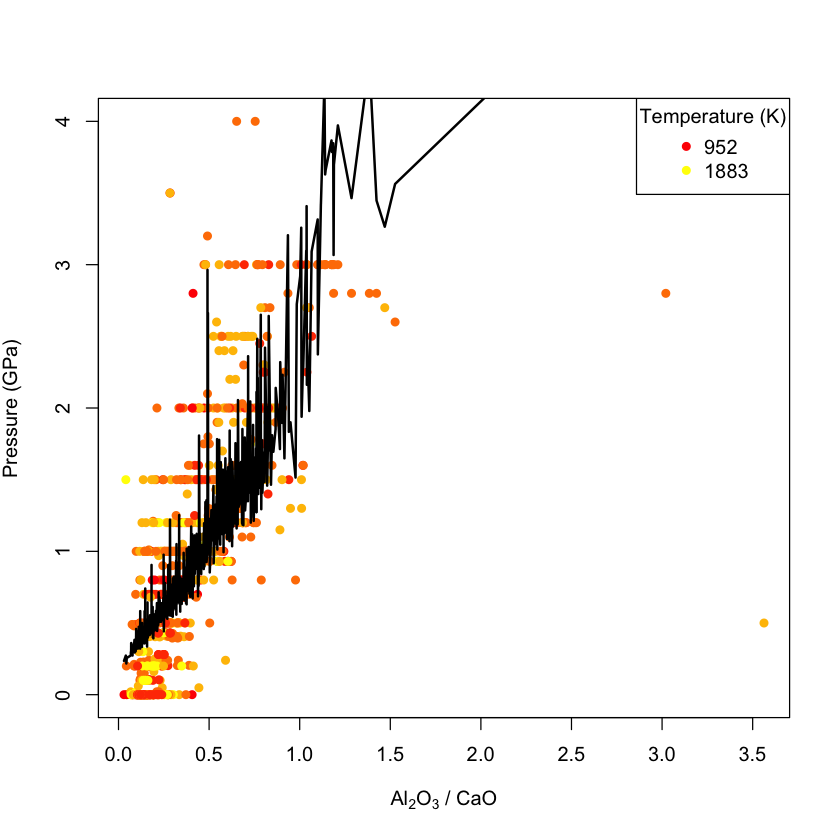

In [83]:
Model <- lm(Y ~ (X1 + X2), data=df)
summary(Model)

plot(df$X1,df$Y,col=col.points,pch=16,cex=1,xlab=X1lab,ylab=ylab) 
legend("topright",title = colourvarname,legend = round(c(min(experiments$T_K),max(experiments$T_K)),0),col = pal(2), pch = 16) #do not change
lines(sort(df$X1), fitted(Model)[order(df$X1)], col="black", type='l',lwd=2) 

plot(df$X2,df$Y,col=col.points,pch=16,cex=1,xlab=X2lab,ylab=ylab) 
legend("topright",title = colourvarname,legend = round(c(min(experiments$T_K),max(experiments$T_K)),0),col = pal(2), pch = 16) #do not change
lines(sort(df$X2), fitted(Model)[order(df$X2)], col="black", type='l',lwd=2) 



Now we can estimate the pressure using the multivariate barometer

In [84]:
bardabunga <- read.table("cpx_bardabunga.txt",sep="\t",header=TRUE)

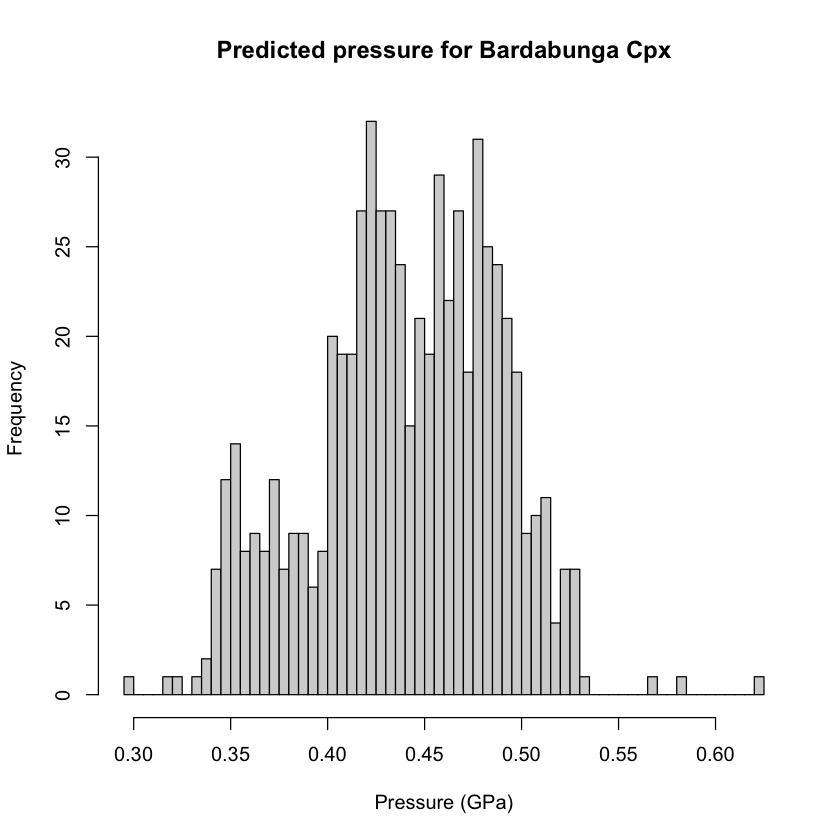

In [85]:

measured.chemistry <- data.frame(
    X1=bardabunga$Na2O / bardabunga$CaO,
    X2=bardabunga$Al2O3 / bardabunga$CaO
)

bardabunga.pressure <- predict(Model,newdata=measured.chemistry)

hist(bardabunga.pressure,xlab="Pressure (GPa)",main="Predicted pressure for Bardabunga Cpx",breaks = 50)


Call:
lm(formula = Y ~ (X1 + X2), data = df)

Coefficients:
(Intercept)           X1           X2  
     0.1466       8.1467       1.1354  


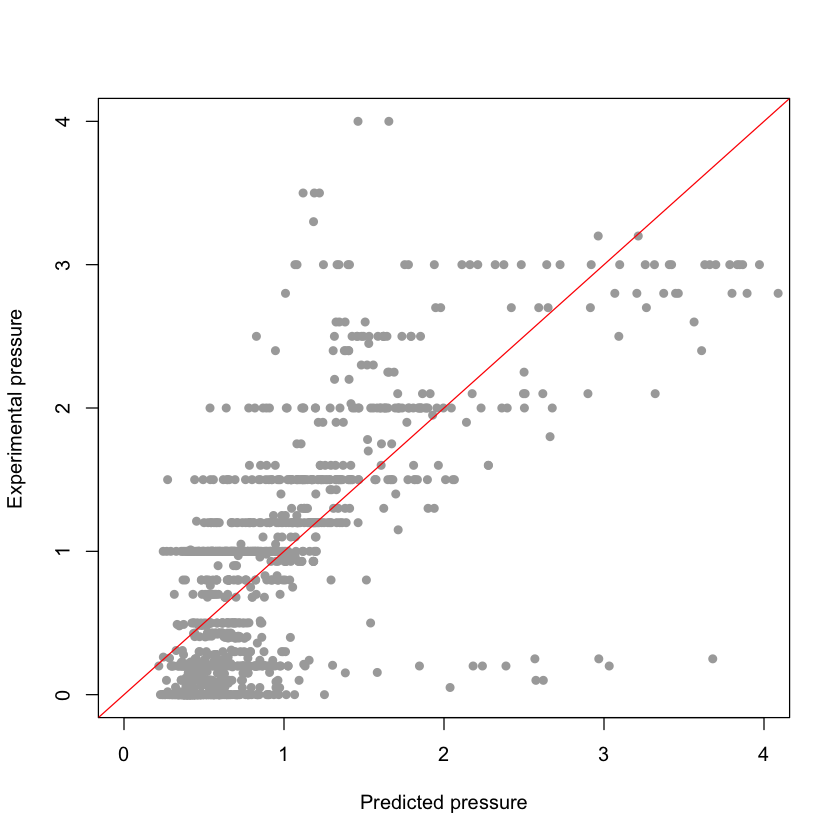

In [92]:
measured.chemistry <- data.frame(X1 = experiments$Na2O.cpx/experiments$CaO.cpx,X2 = experiments$Al2O3.cpx/experiments$CaO.cpx)
Model
plot(predict(Model,newdata=measured.chemistry),experiments$P_GPa,xlim=c(0,4),ylim=c(0,4),col="darkgrey",pch=16, xlab = "Predicted pressure", ylab = "Experimental pressure")
abline(a=0,b=1,col="red")

QUESTION: DOES YOUR REGRESSION OVER- OR UNDER-FIT THE PRESSURE AND AND HOW DOES THIS VARY WITH TEMPERATURE? IS THIS TO DO WITH HOW YOU SUBSETTED THE DATA?